In [1]:
import arcpy
import os
import pandas as pd
from arcgis.gis import GIS
from datetime import date


In [2]:
login = "odelariva"
pw    = "Gaijin1349@@##$$%%^^"
inner_portal = 'https://red-ps-fwp-prtl.esri.com/portal/'
source = GIS(inner_portal, login, pw)

In [3]:
source_users = source.users.search(query='', sort_field='username', sort_order='asc', max_users=10000, outside_org=False, exclude_system=True)

In [4]:
### DO NOT RUN AGAIN
type_list = []
counter = 0
for user in source_users:
    user_content = user.items()
    for items in user_content:
        counter += 1
        print(items.type)
        type_list.append(items.type)
print(counter)

Service Definition
Feature Service
Web Map
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Web Scene
Mobile Map Package
Service Definition
Feature Service
Web Map
Map Service
Network Analysis Service
Web Map
Web Map
Dashboard
Map Service
Web Map
Service Definition
Feature Service
Web Map
Service Definition
Map Service
Network Analysis Service
Service Definition
Feature Service
Service Definition
Feature Service
Service Definition
Feature Service
Web Map
Indoors Map Configuration
Web Mapping Application
Service Definition
Feature Service
Web Map
Indoors Map Configuration
Service Definition
Feature Service
Map Service
Network Analysis Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service


Mobile Map Package
Mobile Map Package
Service Definition
Feature Service
Service Definition
Feature Service
Service Definition
Feature Service
Web Mapping Application
Mobile Map Package
Mobile Map Package
Map Service
Web Map
Indoors Map Configuration
Map Service
Network Analysis Service
Application
Web Mapping Application
Map Service
Web Map
Indoors Map Configuration
Map Service
Network Analysis Service
Map Service
Web Map
Indoors Map Configuration
Map Service
Network Analysis Service
Map Service
Network Analysis Service
Web Mapping Application
Map Service
Web Map
Indoors Map Configuration
Map Service
Web Map
Indoors Map Configuration
Web Mapping Application
Map Service
Network Analysis Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Web Scene
Map Service
Web Map
Indoors Map Configuration
Web Mapping Application
Service Definition
F

In [5]:
## Create set of all the types available. 
myset = set(type_list)
print(myset)

{'Geoprocessing Service', 'File Geodatabase', 'Web Map', 'Network Analysis Service', 'Vector Tile Service', 'Application', 'Code Attachment', 'Scene Service', 'CSV Collection', 'Data Store', 'Web Experience', 'WMS', 'Map Service', 'Vector Tile Package', 'Geometry Service', 'Scene Package', 'Shapefile', 'Feature Service', 'Mobile Map Package', 'Service Definition', 'Dashboard', 'Web Scene', 'Web Mapping Application', 'Image Service', 'GeoJson', 'Indoors Map Configuration', 'CSV'}


In [6]:
MAX_ITEMS_RETURNED = 1000

In [7]:
### Creating a huge lyst of all the types of services there with their approrpiate results

type_results_list = []
for sets in myset:
    set_result = sets + "_result" 
    set_result= source.content.search(query='owner:*', item_type="{0}*".format(sets),max_items = MAX_ITEMS_RETURNED)
    type_results_list.append(set_result)

In [8]:
#Created all CSVs here

today     = date.today()
form_date = today.strftime("%Y_%m_%d")
out_path   = "C:\Working\DoE_Scriptign_5172022\Output_CSV"


major_results_type = []
for item_type_result in type_results_list:
   
    print("Creating {0} related CSV's".format(item_type_result[0].type))
    print("-"*100)
    
    updated_fs_test_list = []
    columns_to_pd_final = []
    for types in item_type_result:
              
        print("Preparing dependencies for: {0}".format(types.title))
        
        columns_to_pd     = ['Item Title','Owner','Item ID','Type']
      
        hold_list = []
        hold_list.append(types.title)
        hold_list.append(types.owner)
        hold_list.append(types.itemid)
        hold_list.append(types.type)
        
         ## Create the loop here for dependencies
        if types.dependent_upon()['list'] == []:
            hold_list.append('NO DEPENDENCIES UPON')
            columns_to_pd.append('Dependent Upon')
        #### Dont need this else here, TODO FIX
        else:
            #print("Number of Dependencies: {0}".format(len(types.dependent_upon()['list'])))
            if len(types.dependent_upon()['list']) > 1:
                for deps in types.dependent_upon()['list']:
                    #print("Dependency Type: {0}".format(deps['dependencyType']))
                    if deps['dependencyType'] == 'id':
                        hold_list.append(deps['id'])
                    elif deps['dependencyType'] == 'url':
                        hold_list.append(deps['url'])
                    elif deps['dependencyType'] == 'serverId':
                        hold_list.append(deps['id'])
                pd_counter_upon = len(types.dependent_upon()['list'])
                #print("LENGTH OF DEP UPON:{0}".format(pd_counter_upon))
                for pd_counter in range(pd_counter_upon):
                    columns_to_pd.append("Dependent Upon " + str(pd_counter + 1))
        
                    
            elif len(types.dependent_upon()['list']) == 1:
                columns_to_pd.append('Dependent Upon')
    #             print("My dependency is {0}".format(maps.dependent_to()['list'][0]['id']))
                for deps in types.dependent_upon()['list']:
                    #print("Dependency Type: {0}".format(deps['dependencyType']))
                    #print(deps['dependencyType'])
                    if deps['dependencyType'] == 'id':
                        hold_list.append(deps['id'])
                    elif deps['dependencyType'] == 'url':
                        hold_list.append(deps['url'])
                    elif deps['dependencyType'] == 'serverId':
                        hold_list.append(deps['id'])
                        
       
        #### Created Depdendent to
        if types.dependent_to()['list'] == []:
            #print('NO DEPENDENCIES')
            hold_list.append('NO DEPENDENCIES TO')
            columns_to_pd.append('Dependent To')
        else:
            #print("Number of Dependencies: {0}".format(len(types.dependent_to()['list'])))
            if len(types.dependent_to()['list']) > 1:
                
                for deps in types.dependent_to()['list']:
                    #print("Dependency Type: {0}".format(deps['dependencyType']))
                    if deps['dependencyType'] == 'id':
                        hold_list.append(deps['id'])
                    elif deps['dependencyType'] == 'url':
                        hold_list.append(deps['url'])
                    elif deps['dependencyType'] == 'serverId':
                        hold_list.append(deps['id'])
                ### Create new counter here instead of doing it twice
                pd_counter_to = len(types.dependent_to()['list'])
                #print("LENGTH OF DEP TO:{0}".format(pd_counter_to))
                for pd_counter in range(pd_counter_to):
                    columns_to_pd.append("Dependent To " + str(pd_counter + 1))
        
            elif len(types.dependent_to()['list']) == 1:
                columns_to_pd.append('Dependent To')
    #             print("My dependency is {0}".format(maps.dependent_to()['list'][0]['id']))
                #print("Dependency Type: {0}".format(deps['dependencyType']))
                #print(deps['dependencyType'])
                if deps['dependencyType'] == 'id':
                    hold_list.append(deps['id'])
                elif deps['dependencyType'] == 'url':
                    hold_list.append(deps['url'])
                elif deps['dependencyType'] == 'serverId':
                    hold_list.append(deps['id'])
                    
        
        if len(columns_to_pd_final) < len(columns_to_pd):
            columns_to_pd_final = columns_to_pd
    
        
        updated_fs_test_list.append(hold_list)
        
    out_path_append = "{0}_{1}_{2}".format(item_type_result[0].type, "_Dependency_Report_", form_date)
    out_path_name = os.path.join(out_path, out_path_append + ".csv")
    hold_df = pd.DataFrame((updated_fs_test_list),columns = columns_to_pd_final)
    
    if os.path.exists(out_path_name):
        os.remove(out_path_name)
        print("{0} has been deleted.".format(out_path_name))
        
    hold_df.to_csv(out_path_name)   
    
#     try:

#         hold_df = pd.DataFrame((updated_fs_test_list),columns = columns_to_pd)
#         #hold_df = pd.DataFrame((updated_fs_test_list))
    
#     except ValueError:
#         print("{0} has incorrect columbs, will pass".format(types.title))
#         missing_reports += 1
   
    
    print("\n")
    
print("Tool has completed successfully!")

Creating Geoprocessing Service related CSV's
----------------------------------------------------------------------------------------------------
Preparing dependencies for: RasterUtilities
Preparing dependencies for: PrintingTools
Preparing dependencies for: RasterUtilities
Preparing dependencies for: OfflinePackaging
Preparing dependencies for: OfflinePackaging
Preparing dependencies for: GeocodingTools
Preparing dependencies for: UpdateVacancy_demo
Preparing dependencies for: UpdateVacancy
Preparing dependencies for: PrintingTools
Preparing dependencies for: GenerateOccupantFeatures_thahka
Preparing dependencies for: GeocodingTools
Preparing dependencies for: PrintingTools
Preparing dependencies for: OfflinePackaging
Preparing dependencies for: RasterUtilities
Preparing dependencies for: GeocodingTools
Preparing dependencies for: OfflinePackaging
Preparing dependencies for: GeocodingTools
Preparing dependencies for: PrintingTools
Preparing dependencies for: RasterUtilities


Creatin

Preparing dependencies for: Clippers Demo Viewer Web Map 5
Preparing dependencies for: GSA_WebMap_6162021
Preparing dependencies for: 0812_Indoors_3D_Scene_w_Points
Preparing dependencies for: Work Order Creation Debug
Preparing dependencies for: ArcGIS Online
Preparing dependencies for: Imagery Hybrid (Local Language)
Preparing dependencies for: San Bernardino Space Planner
Preparing dependencies for: ArcGIS Mission Responder
Preparing dependencies for: ArcGIS for Power BI
Preparing dependencies for: ArcGIS Viewer for Flex Application Builder
Preparing dependencies for: Indoors Web App
Preparing dependencies for: Planner_Marketing_App
Preparing dependencies for: ArcGIS AppStudio
Preparing dependencies for: Indoor Viewer CNNPRJDEV
Preparing dependencies for: Map_MPK021_8262021
Preparing dependencies for: FB_Testing_5132021
Preparing dependencies for: Indoors Viewer
Preparing dependencies for: ArcGIS QuickCapture Web Designer
Preparing dependencies for: OpenStreetMap Vector Basemap (wit

Preparing dependencies for: Map Publish Indoor Viewer
Preparing dependencies for: Clippers Demo - VIP Parking-Copy
Preparing dependencies for: Clippers Demo Security Camera People Count
Preparing dependencies for: Clippers Demo - VIP Parking
Preparing dependencies for: Clippers Demo Sensors
Preparing dependencies for: Planner_General_App
Preparing dependencies for: Updated Enterprise Clippers Demo Wait Time


Creating Network Analysis Service related CSV's
----------------------------------------------------------------------------------------------------
Preparing dependencies for: Visitor Network
Preparing dependencies for: MPK52 Network
Preparing dependencies for: 20210520_Network_FB
Preparing dependencies for: San Manuel Routing Service
Preparing dependencies for: Network_Redlands_Clippers
Preparing dependencies for: YoloNetwork_9222021_001
Preparing dependencies for: CapitolNetwork
Preparing dependencies for: Network_Redlands_Clippers_Auditorium
Preparing dependencies for: Network

Preparing dependencies for: Hanford_SpacePlanner_852021
Preparing dependencies for: ArcGIS Maps for Adobe Creative Cloud
Preparing dependencies for: ArcGIS Workflow Manager
Preparing dependencies for: FB_Test_4122021
Preparing dependencies for: Runtime StreetMap Premium Latin America
Preparing dependencies for: ArcGIS for Android
Preparing dependencies for: ArcGIS Tracker
Preparing dependencies for: Planner_Sales_App
Preparing dependencies for: ArcGIS Enterprise Sites
Preparing dependencies for: Runtime StreetMap Premium Asia Pacific
Preparing dependencies for: ArcGIS Companion
Preparing dependencies for: FB Indoor Viewer Test
Preparing dependencies for: GSA_AppWebLayer_6152021
Preparing dependencies for: Esri Maps for Salesforce
Preparing dependencies for: ArcGIS AppStudio
Preparing dependencies for: ArcGIS Survey123
Preparing dependencies for: Hanford_SpacePlannerApp_852021
Preparing dependencies for: ArcGIS Workforce
Preparing dependencies for: Indoors Test
Preparing dependencies fo

Exception: An unknown error occurred: Traceback (most recent call last):
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 1036, in post
    url=url, data=params, cert=cert, files=files, timeout=timeout
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\requests\sessions.py", line 590, in post
    return self.request('POST', url, data=data, json=json, **kwargs)
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\requests\sessions.py", line 542, in request
    resp = self.send(prep, **send_kwargs)
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\requests\sessions.py", line 655, in send
    r = adapter.send(request, **kwargs)
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\requests\adapters.py", line 449, in send
    timeout=timeout
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\urllib3\connectionpool.py", line 706, in urlopen
    chunked=chunked,
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\http\client.py", line 1373, in getresponse
    response.begin()
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\ssl.py", line 1071, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\ssl.py", line 929, in read
    return self._sslobj.read(len, buffer)
KeyboardInterrupt


In [32]:
### DELETE 
for items_type in type_results_list:
    print(items_type[0].type)
    print(items_type

Vector Tile Package
Mobile Map Package
Vector Tile Service
GeoJson
Network Analysis Service
Indoors Map Configuration
Web Mapping Application
Map Service
Image Service
WMS
Code Attachment
Web Scene
Web Experience
Mobile Application
Scene Package
Geoprocessing Service
Shapefile
Scene Service
Web Mapping Application
Data Store
CSV Collection
CSV
File Geodatabase
Feature Service
Service Definition
Geometry Service
Dashboard


In [80]:
type_results_list[17][0].type

'Feature Service'

In [10]:
# for types in type_results_list[17]:
#     #print(types.title)
#     print(len(types.dependent_to()['list']))

In [11]:
### DELETE
little_counter = 0
for types in type_results_list[21]:
    print(types.title)
    if types.title == 'Work Orders':
       break
    else:
        little_counter += 1
print(little_counter)
    

FB_3DScene_5172021
FB_3DSceneTest_552021
FB Scene Test 5
TestScene
Reproduce_Data_Issue
Reproduce_Data_Issue_01
3D Testing Scene
Grady_3D_Test_Scene_02
3D_Scene_4272021
0817_Indoors_3D
Reproduce_Data_Issue_02
FB_TestScene_ObjectScene_6162021
FB_AllSiteScene_910201
FB Test Scene
FB Test Scene 3
Default Web Scene
FB_WebLayer_6172021
My scene
FB Test Scene 2
0813_Indoors_3D
FB_MPK021_8262021
FB_WebLayer_6222021
FB_WebScene_8252021
Esri Campus Building E with Elevation Offset
Grady_Data_Test_001
FB_21_BSLK_5172021
FB_TestScene_6142021
EsriCampus_BuildingE_3122021
FB_Scene_4272021
FB_ObjectScene_6172021
FB_TestingScene_FacilityFC_5132021
Building1_Scene
FB_LocalSceneTest_5122021
FB_TestScene_5132021
GSA_WebSceneTest_6162021
FB_ObjectScene_6222021
FB Scene Test 4
Grady_3D_Test_Scene_01
Scene_RelTest_11122021
GSA_WebLayerScene_6152021
ArcGIS Indoors _ Sample Web Scene
Indoor Viewer
NAV_Scene
GSA_WebSceneTest_6162021_02
3D Testing Scene_01
EsriRedlandsCampus_WebMerc_SceneViewer
Test Scene 1
47

In [12]:
### DELETE
test_list = []
test_list.append(type_results_list[21][52].title)
test_list.append(type_results_list[21][52].owner)
test_list.append(type_results_list[21][52].id)
test_list.append(type_results_list[21][52].type)
for deps in type_results_list[21][52].dependent_upon()['list']:
    test_list.append(deps['id'])
for deps in type_results_list[21][52].dependent_to()['list']:
    test_list.append(deps['id'])

IndexError: list index out of range

In [27]:
type_results_list[0].title

AttributeError: 'list' object has no attribute 'title'

In [17]:
### DELETE
for deps in type_results_list[21][52].dependent_to()['list']:
    print(deps)

IndexError: list index out of range

In [90]:
### DELETE
test_list

['Work Orders',
 'odelariva',
 'f7f09195095a4edd8f4db0df8e319f7b',
 'Feature Service',
 'o6BoLDMq2XMTgW1z',
 'bf0951c7a8124c00b9d48c9ffae6df44',
 '27c3dcb51c2741b9a8658a3e18ce8efe',
 '70a9ea3fed404cd3a2bcc52593711eeb',
 '662a30aed6d24e2b8449cfcef249e0fa',
 'f326544c7c38498c9d1ee4af63a42886',
 '0d19482405b4408293ddf3fd415a5be3']

In [91]:
### DELETE
test_in_test_list = [test_list]

In [92]:
### DELETE
test_in_test_list[0]

['Work Orders',
 'odelariva',
 'f7f09195095a4edd8f4db0df8e319f7b',
 'Feature Service',
 'o6BoLDMq2XMTgW1z',
 'bf0951c7a8124c00b9d48c9ffae6df44',
 '27c3dcb51c2741b9a8658a3e18ce8efe',
 '70a9ea3fed404cd3a2bcc52593711eeb',
 '662a30aed6d24e2b8449cfcef249e0fa',
 'f326544c7c38498c9d1ee4af63a42886',
 '0d19482405b4408293ddf3fd415a5be3']

In [98]:
### DELETE
columns_to_pd_test     = ['Item Title','Owner', 'ID', 'Type','dependent to', 'depdendent upon 1','depdendent upon 2','depdendent upon 3','depdendent upon 4','depdendent upon 5', 'depdendent upon 6' ]

In [99]:
### DELETE
test_hold_df = pd.DataFrame((test_in_test_list),columns = columns_to_pd_test)

In [95]:
### DELETE
test_hold_df

,Item Title,Owner,ID,Type,dependent to,depdendent upon 1,depdendent upon 2,depdendent upon 3,depdendent upon 4,depdendent upon 5,depdendent upon 6
0,Work Orders,odelariva,f7f09195095a4edd8f4db0df8e319f7b,Feature Service,o6BoLDMq2XMTgW1z,bf0951c7a8124c00b9d48c9ffae6df44,27c3dcb51c2741b9a8658a3e18ce8efe,70a9ea3fed404cd3a2bcc52593711eeb,662a30aed6d24e2b8449cfcef249e0fa,f326544c7c38498c9d1ee4af63a42886,0d19482405b4408293ddf3fd415a5be3


In [5]:
from datetime import date

today = date.today()

d1 = today.strftime("%Y_%m_%d")
print(d1)

2022_07_01


In [58]:
#### Try this URL method after speaking with TOM
### Iterating through item URL

for types in type_results_list[17]:
    print(types.url)
    #print(types.type)

https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/TestScene_WSL5/FeatureServer
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/FB_Test_Scene_WSL1/FeatureServer
https://red-ps-fwp-prtl.esri.com/server/rest/services/Planner_20211109_Sales/FeatureServer
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/FacilitiesTextured_6142021/FeatureServer
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Feature_Layer_11042021/FeatureServer
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/TestScene_WSL10/FeatureServer
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/FB_Scene_Test_5_WSL2/FeatureServer
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/FB_Test_Scene_WSL3/FeatureServer
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/wf_temp_dates_local/FeatureServer
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/GSA_WebSceneTest_6162021_02_WSL2/FeatureServer
https://red-ps-fwp-prtl.esri.com/hosted/r

In [89]:
### Cleaning and updating URL, will need to check this with TOM and ensure that it will work 
### 2nd link is how it should work 

print(type_results_list[17][0].url.replace('rest','admin').replace('/FeatureServer','.SceneServer') + '/iteminfo/manifest/manifest.json')
print('https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/TestScene_WSL5.SceneServer/iteminfo/manifest/manifest.json')

test_url = type_results_list[17][0].url.replace('rest','admin').replace('/FeatureServer','.SceneServer') + '/iteminfo/manifest/manifest.json'

https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/TestScene_WSL5.SceneServer/iteminfo/manifest/manifest.json
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/TestScene_WSL5.SceneServer/iteminfo/manifest/manifest.json


In [210]:
import requests
import urllib3

In [211]:
### Login and parameters for item itereation

login = "odelariva"
pw    = "Gaijin1349@@##$$%%^^"
my_portal = r'red-ps-fwp-prtl.esri.com/'
#https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken
token = 'di5TpMipLhsESMUOeLDeohQLMT-JFpUHCf-uvxn163A9_e-mssT0hKz7K_GDsA0ate1EcRSunJ5NVzXztClN2c0dSRp2c8QObCYEire8HEVYrtul4xDFfZTYZABOIXbEfRdnobW_r84StEa9Fdu0pTsRn09-MTRin0NrAk7watUIDJpqq0GILJ1vnMBxLnBHNEKl9lsiwEVip9P8FjHgtA..'
serverPort = 6443
my_url = r'red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/TestScene_WSL5.SceneServer/iteminfo/manifest/manifest.json'

In [335]:
counter = 0
for items_type in type_results_list:
    print('{0} in position:  {1}'.format(items_type[0].type, counter))
    counter += 1

Geoprocessing Service in position:  0
File Geodatabase in position:  1
Web Mapping Application in position:  2
Network Analysis Service in position:  3
Vector Tile Service in position:  4
Mobile Application in position:  5
Code Attachment in position:  6
Scene Service in position:  7
CSV Collection in position:  8
Data Store in position:  9
Web Experience in position:  10
WMS in position:  11
Map Service in position:  12
Vector Tile Package in position:  13
Geometry Service in position:  14
Scene Package in position:  15
Shapefile in position:  16
Feature Service in position:  17
Mobile Map Package in position:  18
Service Definition in position:  19
Dashboard in position:  20
Web Scene in position:  21
Web Mapping Application in position:  22
Image Service in position:  23
GeoJson in position:  24
Indoors Map Configuration in position:  25
CSV in position:  26


In [377]:
### Logic for Shapefile connection

for types in type_results_list[26]:
    print(types.url)


None
None
None
None


In [408]:
### Logic for Feature Services Collection and incorporation map and scene serveice
### Appending to lists 

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

params = {'f': 'json', 'token': token}
types_list = ['Scene Service','Map Service','Feature Service']

list_001 = []

for type_results in type_results_list:
    list_001_hold = []
    if type_results[0].type not in types_list:
        print("{0} will not be processed ".format(type_results[0].type)) 
        print('\n')
        pass
    elif type_results[0].type == 'Scene Service' or type_results[0].type == 'Map Service':
        subbing_data = types_results[0].type.replace(' ','')
        for types in type_results:
            print(types.url.replace('rest','admin').replace('/' + str(subbing_data),'.' + str(subbing_data)) + '/iteminfo/manifest/manifest.json')
            list_001_hold.append(types.url.replace('rest','admin').replace('/' + str(subbing_data),'.' + str(subbing_data)) + '/iteminfo/manifest/manifest.json')
            response = requests.post(result_url,params = params, verify = False)
            response_json = response.json()
            print(response_json['resources'][0]['onPremisePath'])
            list_001_hold.append(response_json['resources'][0]['onPremisePath'])
            
            print('-'*50)
            print('\n')
    else:
        for types in type_results:
            if types.url is None or types.url == '':
                print("NONE TYPE PRESENT")
                
            else:
                try:
                    result_url = types.url.replace('rest','admin').replace('/FeatureServer','.FeatureServer') + '/iteminfo/manifest/manifest.json'
                    print("Getting result for URL: {0}".format(result_url))
                    list_001_hold.append(result_url)
                    response = requests.post(result_url,params = params, verify = False)
                    response_json = response.json()
                except:
                    list_001_hold.append('JSON FAILED')
                    print("JSON FAILED")

                #print(response_json)
                if 'databases' in response_json:
                    print("TRUE RETURN")
                    split_resposne_json = response_json['databases'][0]['onServerConnectionString'].split(';')
                    list_001_hold.append(split_resposne_json)
                    print(split_resposne_json[5])

                else:
                    print("FALSE RETURN")
                    try:
                        result_url = types.url.replace('rest','admin').replace('/FeatureServer','.SceneServer') + '/iteminfo/manifest/manifest.json'
                        response = requests.post(result_url,params = params, verify = False)
                        response_json = response.json()
                    except:
                        print("JSON FAILED")
                    if 'resources' in response_json:
                        print(response_json['resources'][0]['onPremisePath'])
                        list_001_hold.append(response_json['resources'][0]['onPremisePath'])
                    else:
                        if 'status' not in response_json:
                            print("OFF RESULT")
                            print(response_json)
                        else:
                            print(response_json['status'])
                            list_001_hold.append(response_json['status'])

                print("-------------------------------")
                print("\n")
    list_001.append(list_001_hold)
print("TOOL DONE!!!")

Geoprocessing Service will not be processed 


File Geodatabase will not be processed 


Web Mapping Application will not be processed 


Network Analysis Service will not be processed 


Vector Tile Service will not be processed 


Mobile Application will not be processed 


Code Attachment will not be processed 


https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/0817_Indoors_3D_WSL6/SceneServer/iteminfo/manifest/manifest.json


KeyError: 'resources'

In [406]:
list_001

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 ['https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/0817_Indoors_3D_WSL6/SceneServer/iteminfo/manifest/manifest.json',
  'D:\\arcgisserver\\directories\\arcgisjobs\\system\\publishingtoolsex_gpserver\\j59c5a945145c4aa6ad03a3f7dd656a93\\scratch\\sdFolder\\v101\\FacilitiesTextured_WebLayer_6152021.ssd',
  'https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/N2_Viaduct_SLPK/SceneServer/iteminfo/manifest/manifest.json',
  'D:\\arcgisserver\\directories\\arcgisjobs\\system\\publishingtoolsex_gpserver\\j59c5a945145c4aa6ad03a3f7dd656a93\\scratch\\sdFolder\\v101\\FacilitiesTextured_WebLayer_6152021.ssd',
  'https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/Facilities/SceneServer/iteminfo/manifest/manifest.json',
  'D:\\arcgisserver\\directories\\arcgisjobs\\system\\publishingtoolsex_gpserver\\j59c5a945145c4aa6ad03a3f7dd656a93\\scratch\\sdFolder\\v101\\FacilitiesTextured_WebLayer_6152021.ssd',
  'https://red-ps-fwp-prtl.esri.

In [343]:
### Logic for MapServer connection

for types in type_results_list[12]:
    print(types.url.replace('rest','admin').replace('/MapServer','.MapServer') + '/iteminfo/manifest/manifest.json')
    response = requests.post(result_url,params = params, verify = False)
    response_json = response.json()
    print(response_json['resources'][0]['onPremisePath'])
    print('-'*50)
    print('\n')
        

https://red-ps-fwp-prtl.esri.com/hosted/admin/services/20210514_2_FB_WebMap_MIL1.MapServer/iteminfo/manifest/manifest.json
D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Building1_Routing.MapServer/iteminfo/manifest/manifest.json
D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/server/admin/services/San_Manuel_Indoor_Map_CNNPRJDEV_EGDB_Ref_Exploratory_MIL1.MapServer/iteminfo/manifest/manifest.json
D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_615202

D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Facilities_Map_WO_12222021_MIL1.MapServer/iteminfo/manifest/manifest.json
D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/server/admin/services/20210520_Network_FB_2.MapServer/iteminfo/manifest/manifest.json
D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Facilities_Map_Yolo__WO_1215202

D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/hosted/admin/services/SampleWorldCities.MapServer/iteminfo/manifest/manifest.json
D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Network_Service.MapServer/iteminfo/manifest/manifest.json
D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/server/admin/services/Planner_20211109_Marketing.MapServer/iteminfo/manif

D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Network_Publish2.MapServer/iteminfo/manifest/manifest.json
D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/image/admin/services/ImageryTest.MapServer/iteminfo/manifest/manifest.json
D:\arcgisserver\directories\arcgisjobs\system\publishingtoolsex_gpserver\j59c5a945145c4aa6ad03a3f7dd656a93\scratch\sdFolder\v101\FacilitiesTextured_WebLayer_6152021.ssd
--------------------------------------------------


https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Facebook_Unified_Web_Map_MIL1.MapServer/iteminfo/manifest

In [345]:
### Logic for Shapefile connection

for types in type_results_list[16]:
    print(types.url)

        

None
None


In [413]:
### Logic for Scene Server connection

for types in type_results_list[7]:
    print(types.url)
    print(types.url.replace('rest','admin').replace('/SceneServer','.SceneServer') + '/iteminfo/manifest/manifest.json')
    response = requests.post(result_url,params = params, verify = False)
    response_json = response.json()
    print(response_json)
#     print(response_json['resources'][0]['onPremisePath'])
#     print('-'*50)
#     print('\n')

https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/0817_Indoors_3D_WSL6/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/0817_Indoors_3D_WSL6.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/N2_Viaduct_SLPK/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/N2_Viaduct_SLPK.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Facilities/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/Facilities.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_

{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/0813_Indoors_3D_WSL4/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/0813_Indoors_3D_WSL4.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/GSA_TestWholeScene_6520221_01_WSL1/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/GSA_TestWholeScene_6520221_01_WSL1.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Walls3D_objectScenepackage_6162021/SceneServer
https

{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/GSA_WebSceneTest_6162021_WSL1/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/GSA_WebSceneTest_6162021_WSL1.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/SLPK_Test_11102021_01/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/SLPK_Test_11102021_01.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/FB_AllSiteScene_910201_WSL3/SceneServer
https://red-ps-fwp-p

{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/EsriCampus_BuildingE_3122021_WSL3/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/EsriCampus_BuildingE_3122021_WSL3.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Floors3D_LS_5122021/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/Floors3D_LS_5122021.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/SLPK_Test_11082021_001/SceneServer
https://red-ps-fwp-pr

{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Grady_3D_Test_Scene_02_WSL1/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/Grady_3D_Test_Scene_02_WSL1.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Building1_Scene_WSL2/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/Building1_Scene_WSL2.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/N2_Viaduct_Section_SLPK_08112021_152901/SceneServer
https://red-ps

{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/SLPK_Test_10101010/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/SLPK_Test_10101010.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/FacilitiesTexturedslpk/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/FacilitiesTexturedslpk.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Furniture3D_6172021/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/se

{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/0813_Indoors_3D_WSL2/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/0813_Indoors_3D_WSL2.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Facilities_Textured_6142021/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/Facilities_Textured_6142021.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Facilities3D_LS_5212021/SceneServer
https://red-ps-fwp-prtl.esri.c

{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/TestScene_WSL3/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/TestScene_WSL3.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/BuildingE_SLPK/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/BuildingE_SLPK.SceneServer/iteminfo/manifest/manifest.json
{'status': 'error', 'messages': ["Could not find resource or operation 'Planner_20211109_Sales.SceneServer' on the system."], 'code': 404}
https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/ArcGIS_Indoors___Sample_Web_Scene_WSL4/SceneServer
https://red-ps-fwp-prtl.esri.com/hosted/admin/service

In [351]:
### Logic for File geodatabase connection

for types in type_results_list[1]:
    print(types.url)
#     print(types.url.replace('rest','admin').replace('/SceneServer','.SceneServer') + '/iteminfo/manifest/manifest.json')
#     response = requests.post(result_url,params = params, verify = False)
#     response_json = response.json()
#     print(response_json['resources'][0]['onPremisePath'])
#     print('-'*50)
#     print('\n')

None
None


In [ ]:
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
params = {'f': 'json', 'token': token}

for types in type_results_list[12]:
    if types.url is None or types.url == '':
        print("NONE TYPE PRESENT")
    else:
        try:
            result_url = types.url.replace('rest','admin').replace('/FeatureServer','.FeatureServer') + '/iteminfo/manifest/manifest.json'
            print("Getting result for URL: {0}".format(result_url))

            response = requests.post(result_url,params = params, verify = False)
            response_json = response.json()
        except:
            print("JSON FAILED")

        #print(response_json)
        if 'databases' in response_json:
            print("TRUE RETURN")
            split_resposne_json = response_json['databases'][0]['onServerConnectionString'].split(';')
            print(split_resposne_json[5])

        else:
            print("FALSE RETURN")
            try:
                result_url = types.url.replace('rest','admin').replace('/FeatureServer','.SceneServer') + '/iteminfo/manifest/manifest.json'
                response = requests.post(result_url,params = params, verify = False)
                response_json = response.json()
            except:
                print("JSON FAILED")
            if 'resources' in response_json:
                print(response_json['resources'][0]['onPremisePath'])
            else:
                if 'status' not in response_json:
                    print("OFF RESULT")
                    print(response_json)
                else:
                    print(response_json['status'])

        print("-------------------------------")
        print("\n")
print("TOOL DONE!!!")

In [319]:
def get_json_url(input_url,server_replace):
    result_url = types.url.replace('rest','admin').replace('/FeatureServer',server_replace) + '/iteminfo/manifest/manifest.json'
    print("Getting result for URL: {0}".format(result_url))
    response = requests.post(result_url,params = params, verify = False)
    response_json = response.json()
    print(response_json)

In [322]:
get_json_url('https://services5.arcgis.com/qpg0rXb7INsxUJ5Y/arcgis/admin/services/Neighborhood','.FeatureServer')

Getting result for URL: https://services5.arcgis.com/qpg0rXb7INsxUJ5Y/arcgis/admin/services/Neighborhood Names GIS.FeatureServer/iteminfo/manifest/manifest.json
{'error': {'code': 498, 'message': 'Invalid token.', 'details': ['Invalid token.']}}


In [297]:
test_json = {'databases': [], 'resources': [{'onPremisePath': 'D:\\arcgisserver\\directories\\arcgisjobs\\system\\publishingtoolsex_gpserver\\j3c99ba41faed4a67b0f462748b5c8b6c\\scratch\\sdFolder\\v101\\FB_Test_Scene_WSL3.ssd', 'clientName': 'red-ps-fwp-hstd', 'serverPath': 'D:\\arcgisserver\\directories\\arcgissystem\\arcgisinput\\Hosted\\FB_Test_Scene_WSL3.SceneServer\\extracted\\v101\\FB_Test_Scene_WSL3.ssd'}]},{'databases': [], 'resources': [{'onPremisePath': 'D:\\arcgisserver\\directories\\arcgisjobs\\system\\publishingtoolsex_gpserver\\j3c99ba41faed4a67b0f462748b5c8b6c\\scratch\\sdFolder\\v101\\FB_Test_Scene_WSL3.ssd', 'clientName': 'red-ps-fwp-hstd', 'serverPath': 'D:\\arcgisserver\\directories\\arcgissystem\\arcgisinput\\Hosted\\FB_Test_Scene_WSL3.SceneServer\\extracted\\v101\\FB_Test_Scene_WSL3.ssd'}]}

In [299]:
'databases' in test_json

False

In [245]:
print(type_results_list[17][2].url)


https://red-ps-fwp-prtl.esri.com/server/rest/services/Planner_20211109_Sales/FeatureServer


In [ ]:
# https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Planner_20211109_Sales.FeatureServer/iteminfo/manifest/manifest.json

In [246]:

url = 'https://red-ps-fwp-prtl.esri.com/server/admin/services/UC22_13808_Sensors_EGDB.MapServer/iteminfo/manifest/manifest.json'

response = requests.post(url, params=params, verify=False)
print(response)
responseJson = response.json()
json_result = responseJson



<Response [200]>


In [251]:
json_result

{'databases': [{'byReference': True,
   'onServerWorkspaceFactoryProgID': 'esriDataSourcesGDB.SdeWorkspaceFactory',
   'onServerConnectionString': 'ENCRYPTED_PASSWORD=00022e68654b4e6439732f6133343777303179364166466b3874496b624d6e6272644171794a7470587357627538733d2a00;SERVER=red-ps-fwp-egdb;INSTANCE=sde:sqlserver:red-ps-fwp-egdb;DBCLIENT=sqlserver;DB_CONNECTION_PROPERTIES=red-ps-fwp-egdb;DATABASE=UC2022Session13808;USER=UC2022Session13808User;AUTHENTICATION_MODE=DBMS;BRANCH=sde.DEFAULT',
   'onPremiseConnectionString': 'ENCRYPTED_PASSWORD=00022e68654b4e6439732f6133343777303179364166466b3874496b624d6e6272644171794a7470587357627538733d2a00;SERVER=red-ps-fwp-egdb;INSTANCE=sde:sqlserver:red-ps-fwp-egdb;DBCLIENT=sqlserver;DB_CONNECTION_PROPERTIES=red-ps-fwp-egdb;DATABASE=UC2022Session13808;USER=UC2022Session13808User;AUTHENTICATION_MODE=DBMS;BRANCH=sde.DEFAULT',
   'onServerName': 'sde.DEFAULT (red-ps-fwp-egdb)',
   'onPremisePath': '',
   'datasets': [{'onServerName': 'Sensors'}]}],
 'resou

In [247]:
parsed_result = json_result['databases'][0]['onServerConnectionString'].split(';')

In [248]:
parsed_result[5]

'DATABASE=UC2022Session13808'

In [252]:
another_url = 'https://red-ps-fwp-prtl.esri.com/hosted/admin/services/Hosted/Building1_Scene_WFL1.FeatureServer/iteminfo/manifest/manifest.json'

response = requests.post(another_url, params=params, verify=False)
print(response)
responseJson = response.json()
json_result = responseJson
print(json_result)

<Response [200]>
{'databases': [{'byReference': False, 'onServerWorkspaceFactoryProgID': 'esriDataSourcesGDB.SdeWorkspaceFactory', 'onServerConnectionString': 'ENCRYPTED_PASSWORD="00022e684e426a3853436e396664336377326c6a374e584e706a49676d70666655705241613750733173304d4e6b303d2a00";SERVER="RED-PS-FWP-RDS.ESRI.COM";INSTANCE="sde:postgresql:RED-PS-FWP-RDS.ESRI.COM,9876";DBCLIENT="postgresql";DB_CONNECTION_PROPERTIES="RED-PS-FWP-RDS.ESRI.COM,9876";DATABASE="db_hw5r1";USER="hsu_jccuc";VERSION="sde.DEFAULT";AUTHENTICATION_MODE="DBMS"', 'onPremiseConnectionString': 'DATABASE=C:\\Users\\wil12301\\OneDrive - Esri\\Onboarding\\Trainings\\IndoorsVMA\\IndoorsVMA\\Building1.gdb', 'onServerName': 'sde.DEFAULT (RED-PS-FWP-RDS.ESRI.COM)', 'onPremisePath': '', 'datasets': [{'onServerName': 'Building1_Scene_WFL1_Details'}, {'onServerName': 'Building1_Scene_WFL1_Units'}, {'onServerName': 'Building1_Scene_WFL1_Levels'}, {'onServerName': 'Building1_Scene_WFL1_Facilities'}]}], 'resources': [{'onPremisePath'

In [206]:
# params = urllib.parse.urlencode({'token': token, 'f': 'json'})

# print(params)
# headers = {"Content-type": "application/x-www-form-urlencoded", "Accept": "text/plain"}  

# service = 'TestScene_WSL5.SceneServer/iteminfo/manifest/manifest.json'
# serviceURL = "hosted/admin/services/" + service
# print(serviceURL)

# # Connect to service to get its current JSON definition    
# httpConn = httplib2.Http(my_portal, serverPort)
# print(httpConn)


# httpConn.request("GET", serviceURL, params, headers)



In [185]:
# def getToken(username, password, serverName, serverPort):
#     # Token URL is typically http://server[:port]/arcgis/admin/generateToken
#     #tokenURL = "/admin/generateToken"
#     tokenURL = "/sharing/rest/generateToken"
    
#     ## urllib.parse.urlencode()
#     params = urllib.parse.urlencode({'username': username, 'password': password, 'client': 'requestip', 'f': 'json'})
    
#     headers = {"Content-type": "application/x-www-form-urlencoded", "Accept": "text/plain"}
    
#     # Connect to URL and post parameters
    
#     httpConn = httplib2.Http(serverName, serverPort)
#     httpConn.request("POST", tokenURL, params, headers)
    
#     # Read response
#     response = httpConn.getresponse()
#     if (response.status != 200):
#         httpConn.close()
#         print("Error while fetching tokens from admin URL. Please check the URL and try again.")
#         return
#     else:
#         data = response.read()
#         httpConn.close()
        
#         # Check that data returned is not an error object
#         if not assertJsonSuccess(data):            
#             return
        
#         # Extract the token from it
#         token = json.loads(data)        
#         return token['token']            

In [186]:
# getToken(login, pw, my_portal, serverPort)

In [166]:
import httplib2
import urllib
data = {'username': login, 'password': pw, 'token':token}
body = urllib.parse.urlencode(data, encoding='utf-8')
h = httplib2.Http()
resp, content = h.request(test_url, method="GET", body=body)


In [174]:
# content

In [159]:
# response = urlopen(test_url) ### parameter to pass in token?
# print(response.read())

In [66]:
### Different methods for data items in arcgis.GIS
dir(type_results_list[17][0])

['_RELATIONSHIP_DIRECTIONS',
 '_RELATIONSHIP_TYPES',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_publish_status',
 '_create_proxy',
 '_delete_proxy',
 '_depend',
 '_get_icon',
 '_get_nbs_server',
 '_gis',
 '_has_layers',
 '_hydrate',
 '_hydrated',
 '_is_notebook',
 '_populate_layers',
 '_portal',
 '_repr_html_',
 '_snapeshots',
 '_uid',
 '_user_id',
 '_ux_item_type',
 '_workdir',
 'access',
 'accessInformation',
 'add_comment',
 'add_relationship',
 'advancedSettings',
 'appCategories',
 'app_info',
 'avgRating',
 'banner',
 'can_delete',
 'categories',

<Item title:"EsriCampus_BuildingE_3122021_WSL3" type:Scene Layer owner:clippers_demo>
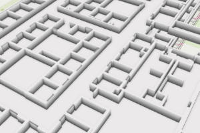

In [107]:
type_results_list[17][0]

In [159]:
type_thing = type_results_list[17][0].resources
print(type_thing)

In [103]:
type_results_list[17][0].resources

In [81]:
### explore more xml stuff
xml_data = type_results_list[17][0].metadata
xml_data

'C:\\Users\\omar9125\\AppData\\Local\\Temp\\1\\metadata.xml'

In [249]:
### Creating XML Dictionary
import xml.etree.ElementTree as ET

tree = ET.parse(xml_data)
  
# get root element
root = tree.getroot()
  

In [250]:
test_dict = root[0][4][1].text

In [248]:
print(root[0].text)

In [179]:
test_dict

'{"type":"CIMLayerDocument","version":"2.7.0","build":26828,"layers":["CIMPATH=Scene/89023fea22884fed8ddcd11bc97cae0e.xml"],"layerDefinitions":[{"type":"CIMFeatureLayer","name":"Points Of Interest","uRI":"CIMPATH=Scene/89023fea22884fed8ddcd11bc97cae0e.xml","sourceModifiedTime":{"type":"TimeInstant"},"useSourceMetadata":true,"description":"Points Of Interest","layerElevation":{"type":"CIMLayerElevationSurface"},"expanded":true,"layer3DProperties":{"type":"CIM3DLayerProperties","castShadows":true,"isLayerLit":true,"layerFaceCulling":"None","maxDistance":152.400000000000006,"minDistance":-1,"preloadTextureCutoffHigh":0,"preloadTextureCutoffLow":0.25,"textureCutoffHigh":0.25,"textureCutoffLow":1,"useCompressedTextures":true,"verticalExaggeration":1,"exaggerationMode":"ScaleZ","verticalUnit":{"uwkid":9001},"lighting":"OneSideDataNormal"},"layerType":"Operational","showLegends":true,"visibility":true,"displayCacheType":"Permanent","maxDisplayCacheAge":5,"popupInfo":{"type":"CIMPopupInfo","ti

In [182]:
import json

In [189]:
res = json.loads(test_dict, strict=False)

In [194]:
res['version']

'2.7.0'

In [195]:
res

{'type': 'CIMLayerDocument',
 'version': '2.7.0',
 'build': 26828,
 'layers': ['CIMPATH=Scene/89023fea22884fed8ddcd11bc97cae0e.xml'],
 'layerDefinitions': [{'type': 'CIMFeatureLayer',
   'name': 'Points Of Interest',
   'uRI': 'CIMPATH=Scene/89023fea22884fed8ddcd11bc97cae0e.xml',
   'sourceModifiedTime': {'type': 'TimeInstant'},
   'useSourceMetadata': True,
   'description': 'Points Of Interest',
   'layerElevation': {'type': 'CIMLayerElevationSurface'},
   'expanded': True,
   'layer3DProperties': {'type': 'CIM3DLayerProperties',
    'castShadows': True,
    'isLayerLit': True,
    'layerFaceCulling': 'None',
    'maxDistance': 152.4,
    'minDistance': -1,
    'preloadTextureCutoffHigh': 0,
    'preloadTextureCutoffLow': 0.25,
    'textureCutoffHigh': 0.25,
    'textureCutoffLow': 1,
    'useCompressedTextures': True,
    'verticalExaggeration': 1,
    'exaggerationMode': 'ScaleZ',
    'verticalUnit': {'uwkid': 9001},
    'lighting': 'OneSideDataNormal'},
   'layerType': 'Operationa

In [199]:
res['layerDefinitions'][0]''

{'type': 'CIMFeatureLayer',
 'name': 'Points Of Interest',
 'uRI': 'CIMPATH=Scene/89023fea22884fed8ddcd11bc97cae0e.xml',
 'sourceModifiedTime': {'type': 'TimeInstant'},
 'useSourceMetadata': True,
 'description': 'Points Of Interest',
 'layerElevation': {'type': 'CIMLayerElevationSurface'},
 'expanded': True,
 'layer3DProperties': {'type': 'CIM3DLayerProperties',
  'castShadows': True,
  'isLayerLit': True,
  'layerFaceCulling': 'None',
  'maxDistance': 152.4,
  'minDistance': -1,
  'preloadTextureCutoffHigh': 0,
  'preloadTextureCutoffLow': 0.25,
  'textureCutoffHigh': 0.25,
  'textureCutoffLow': 1,
  'useCompressedTextures': True,
  'verticalExaggeration': 1,
  'exaggerationMode': 'ScaleZ',
  'verticalUnit': {'uwkid': 9001},
  'lighting': 'OneSideDataNormal'},
 'layerType': 'Operational',
 'showLegends': True,
 'visibility': True,
 'displayCacheType': 'Permanent',
 'maxDisplayCacheAge': 5,
 'popupInfo': {'type': 'CIMPopupInfo',
  'title': '{NAME}',
  'mediaInfos': [{'type': 'CIMTable

In [204]:
res['layerDefinitions'][0]['featureTable']['dataConnection']

{'type': 'CIMFeatureDatasetDataConnection',
 'featureDataset': 'AIIM',
 'workspaceConnectionString': 'DATABASE=..esriindoors.gdb',
 'workspaceFactory': 'FileGDB',
 'dataset': 'PointsOfInterest',
 'datasetType': 'esriDTFeatureClass'}

In [203]:
res['layerDefinitions'][0]['featureTable']['dataConnection']['workspaceConnectionString']

'DATABASE=..esriindoors.gdb'

In [205]:
res['layerDefinitions'][0]['featureTable']['dataConnection']['featureDataset']

'AIIM'

In [208]:
### Next steps, run through TOMS method and understand why that URL is not letting me through
### If i do get through, use URL that is tied to the items and get data from there
### Otherwise, use this method, or use both methods to cmprae and contrast the output

In [213]:
### To get all URL in items, will need to do an IF check if NONE
for item_type_result in type_results_list:
    for type_item in item_type_result:
        print(type_item.url)
    print("=" * 50 )

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
https://red-ps-fwp-prtl.esri.com/server/rest/servi

In [243]:
dict_list_append = []
for item_type_result in type_results_list:
    print("Getting this: {0}".format(item_type_result[0].type))

    for type_item in item_type_result:
        hold_list = []
        print("Getting DB for {0}".format(type_item.title))
        
       
        
        temp_xml = type_item.metadata
        tree = ET.parse(xml_data)
  
        # get root element
        root = tree.getroot()
        
        hold_list.append(type_item.title)
        
        try:
            
            test_dict = root[0][4][1].text
            res = json.loads(test_dict, strict=False)
            hold_list.append(res['version'])
            hold_list.append(res['layerDefinitions'][0]['featureTable']['dataConnection']['workspaceConnectionString'])
        except:
            hold_list.append('FAILED')
            hold_list.append('FAILED')
        dict_list_append.append(hold_list)
    print("="*50)
    print('\n')
print('Done running!')

Getting this: Vector Tile Package
Getting DB for SA_WL_CAD_VT


Getting this: Mobile Map Package
Getting DB for Georgia
Getting DB for North Macedonia
Getting DB for Wisconsin
Getting DB for Building1_Mobile
Getting DB for Bulgaria
Getting DB for NAV_Mobile
Getting DB for Mobile Publish
Getting DB for Costa Rica
Getting DB for Finland
Getting DB for Liechtenstein
Getting DB for District of Columbia
Getting DB for South America Guianas Region
Getting DB for Turkey
Getting DB for Wyoming
Getting DB for M_mobile_v5
Getting DB for Saudi Arabia
Getting DB for Italy
Getting DB for Rhode Island
Getting DB for Qatar
Getting DB for Bahamas
Getting DB for Missouri
Getting DB for Oregon
Getting DB for Portugal
Getting DB for Oman
Getting DB for Lebanon
Getting DB for Australia Tasmania
Getting DB for Arkansas
Getting DB for Poland
Getting DB for Lesotho
Getting DB for California
Getting DB for Latin America
Getting DB for Australia Northern Territory
Getting DB for Middle East
Getting DB for Sout

Getting DB for Simulation Paths 2


Getting this: Network Analysis Service
Getting DB for Visitor Network
Getting DB for MPK52 Network
Getting DB for 20210520_Network_FB
Getting DB for San Manuel Routing Service
Getting DB for Network_Redlands_Clippers
Getting DB for YoloNetwork_9222021_001
Getting DB for CapitolNetwork
Getting DB for Network_Redlands_Clippers_Auditorium
Getting DB for Network publish
Getting DB for Network Service
Getting DB for 20210520_Network_FB_2
Getting DB for Hanford_Route_832021
Getting DB for UCSF_Routing_4272021
Getting DB for Building1_Routing
Getting DB for Yolo_Network_9212021
Getting DB for NetworkPublishing
Getting DB for Indoors at Esri Anonymous Network 2021_05_27
Getting DB for Yolo_Network_9222021
Getting DB for Facebook Unified Network Services
Getting DB for UC2021Session13221_Network
Getting DB for ArcGIS Indoors _ Sample Network
Getting DB for 20210514_FB_Network
Getting DB for Network_20210914_thahka
Getting DB for Network_20210909_delete1
Getti

Getting DB for ArcGIS Web AppBuilder
Getting DB for Clippers Guest Experience App
Getting DB for ArcGIS Explorer
Getting DB for Indoors OAuth (dev)
Getting DB for FB_TestApp_4272021
Getting DB for ArcGIS for AutoCAD
Getting DB for ArcGIS Production Mapping Map Production System (MPS)
Getting DB for ArcGIS Pro
Getting DB for UC2021Session13221_ViewerApp
Getting DB for assistant.esri-ps
Getting DB for Wayback Imagery
Getting DB for ArcGIS Excalibur
Getting DB for ArcGIS Track Viewer
Getting DB for ArcGIS Earth
Getting DB for Indoor Viewer Sample
Getting DB for Indoors at Esri Anonymous Web App 2021_05_27
Getting DB for FB_Viewer_ObjScene_6222021
Getting DB for Indoors OAuth (dev)
Getting DB for ArcGIS Pro
Getting DB for Classic Story Maps
Getting DB for ArcGIS Location Referencing Reporter
Getting DB for ArcGIS for SharePoint
Getting DB for Esri Maps for IBM Cognos
Getting DB for FB_3DMPK021_8262021


Getting this: Map Service
Getting DB for 20210514_2_FB_WebMap_MIL1
Getting DB for Build

Getting DB for ArcGIS Viewer for Flex Application Builder
Getting DB for Indoors Web App
Getting DB for Planner_Marketing_App
Getting DB for ArcGIS AppStudio
Getting DB for Oriented Imagery
Getting DB for Indoor Viewer CNNPRJDEV
Getting DB for FB_Testing_5132021
Getting DB for Indoors Viewer
Getting DB for ArcGIS QuickCapture Web Designer
Getting DB for ArcGIS AppStudio
Getting DB for ArcGIS Indoors
Getting DB for Indiana Indoors Viewer
Getting DB for Runtime StreetMap Premium Middle East and Africa
Getting DB for ArcGIS Field Maps
Getting DB for ArcGIS Drone2Map
Getting DB for ArcGIS Runtime Standard
Getting DB for ArcGIS Roadway Reporter
Getting DB for ArcGIS Indoors
Getting DB for Esri Maps for MicroStrategy
Getting DB for UCSF_TestApp_532021
Getting DB for Yolo_App_9212021
Getting DB for Test Clippers Demo Web Viewer w/ Space Planner Layers
Getting DB for ArcGIS Solutions
Getting DB for Runtime StreetMap Premium North America
Getting DB for Clippers Demo Viewer App
Getting DB for F

Getting DB for OfflinePackaging
Getting DB for GeocodingTools
Getting DB for PrintingTools
Getting DB for RasterUtilities


Getting this: Shapefile
Getting DB for copy_Neighborhood Names GIS
Getting DB for Neighborhood Names GIS


Getting this: Scene Service
Getting DB for EsriCampus_BuildingE_3122021_WSL3
Getting DB for 0817_Indoors_3D_WSL6
Getting DB for N2_Viaduct_SLPK
Getting DB for Facilities
Getting DB for ArcGIS Indoors _ Sample Web Scene_WSL9
Getting DB for Walls3D_5172021
Getting DB for TestScene_WSL4
Getting DB for Floors3D_Object_6172021
Getting DB for Floors3D_6172021
Getting DB for Facilities3D_FC_WGS_513
Getting DB for FB Scene Test 4_WSL2
Getting DB for Levels3D_8262021
Getting DB for FB_AllSiteScene_910201_WSL2
Getting DB for ArcGIS Indoors _ Sample Web Scene_WSL8
Getting DB for FB Test Scene_WSL3
Getting DB for TestScene_WSL7
Getting DB for 0813_Indoors_3D_WSL7
Getting DB for FB Test Scene 3_WSL4
Getting DB for Folder_test_11112021
Getting DB for FacilitiesTextured_614

Getting DB for Streets (Night)
Getting DB for Publish_Map
Getting DB for Clippers Demo Viewer Web Map 5
Getting DB for GSA_WebMap_6162021
Getting DB for 0812_Indoors_3D_Scene_w_Points
Getting DB for Work Order Creation Debug
Getting DB for ArcGIS Online
Getting DB for Imagery Hybrid (Local Language)
Getting DB for San Bernardino Space Planner
Getting DB for ArcGIS Mission Responder
Getting DB for ArcGIS for Power BI
Getting DB for ArcGIS Viewer for Flex Application Builder
Getting DB for Indoors Web App
Getting DB for Planner_Marketing_App
Getting DB for ArcGIS AppStudio
Getting DB for Indoor Viewer CNNPRJDEV
Getting DB for Map_MPK021_8262021
Getting DB for FB_Testing_5132021
Getting DB for Indoors Viewer
Getting DB for ArcGIS QuickCapture Web Designer
Getting DB for OpenStreetMap Vector Basemap (with Relief - WGS84)
Getting DB for OpenStreetMap Vector Basemap (WGS84)
Getting DB for National Geographic Style Map
Getting DB for Clippers_GuestMap_3242021
Getting DB for UCSF_TestMap504202

Getting DB for OpenStreetMap Vector Basemap (Esri Street with Relief style)
Getting DB for CapitolVisitor
Getting DB for UCSF_Test_4302021
Getting DB for ArcGIS Workforce
Getting DB for YoloMap_9212021
Getting DB for ArcGIS Experience Builder
Getting DB for 20210514_FB_WebMap
Getting DB for Planner_Map
Getting DB for Community Map
Getting DB for Imagery Hybrid
Getting DB for FB_WSLayer_6222021
Getting DB for Ocean Basemap
Getting DB for Indoors at Esri Anonymous 2021_06_02_v2
Getting DB for Testing_3D_Modeling_w_Web_App_Builder
Getting DB for San Manuel Indoor Map CNNPRJDEV EGDB MIL Map
Getting DB for OpenStreetMap Vector Basemap (Blueprint - WGS84)
Getting DB for Facebook Demo Indoor Web Viewer
Getting DB for ArcGIS Drone2Map
Getting DB for OpenStreetMap Vector Basemap (Esri Light Gray Canvas)
Getting DB for Building1_App
Getting DB for KP Test
Getting DB for DOJ_Planner
Getting DB for GSA_WebMap_6162021_01
Getting DB for Location Tracking
Getting DB for Nova Map
Getting DB for ArcGIS

Getting DB for 3D_Scene_4272021_WFL1
Getting DB for FB_AllSiteScene_910201_WSL3
Getting DB for FB_Map_4272021_WFL1
Getting DB for Security_Camera_People_Counts
Getting DB for Equipment
Getting DB for 0817_Indoors_3D_WSL8
Getting DB for Scene_WebScene_6162021_WSL1
Getting DB for Walls3D_6142021
Getting DB for 3D_Scene_4272021_WSL4
Getting DB for Walls3D_6172021
Getting DB for UCSF_Test_4302021_WFL1
Getting DB for CapitolWeb_rev3_WFL1
Getting DB for Rooms3D_6172021
Getting DB for Viaduct_Layer_11102021
Getting DB for Simulation Story Paths
Getting DB for GSA_WebSceneTest_6162021_02_WSL3
Getting DB for Scene_RelTest_11122021_WSL1
Getting DB for 3D Testing Scene_WSL1
Getting DB for FB Test Scene 2_WSL2
Getting DB for UCSF_TestMap532021_01_WFL1
Getting DB for UCSF_TestMap5042021_WFL1
Getting DB for TestScene_WSL11
Getting DB for TestScene_WSL3
Getting DB for SecurityCameraPeopleCounts
Getting DB for FB_WebScene_8252021_WSL1
Getting DB for Indoors at Esri Anonymous 2021_06_02_v2_WFL1
Getting

Getting DB for Grady_3D_Test_Scene_01_WFL1
Getting DB for 3D_Scene_4272021_WSL3
Getting DB for 0817_Indoors_3D_WSL4
Getting DB for FL_11112021_104908
Getting DB for HanfordMap_852021_WFL1
Getting DB for Rooms3D_6172021
Getting DB for EsriCampus_BuildingE_3122021_WSL7
Getting DB for UCSF_TestingMap_4292021_WFL1
Getting DB for 3D_Scene_4272021_WSL1
Getting DB for Facilities_Textured_6142021
Getting DB for Feature_Layer_11042021
Getting DB for Reproduce_Data_Issue_01_WFL1
Getting DB for 0813_Indoors_3D_WSL4
Getting DB for Test_Layer_11012021_03
Getting DB for CapitolVisitor_rev_WFL1
Getting DB for Equipment
Getting DB for FB Test Scene_WSL3
Getting DB for 0813_Indoors_3D_WSL8
Getting DB for Floors3D_6172021
Getting DB for TestScene_WFL1
Getting DB for 3D_Scene_4272021_WSL4
Getting DB for Building1_Scene_WSL4
Getting DB for Furniture_WebLayer_6152021
Getting DB for UCSF_TestMap532021_04_WFL1
Getting DB for FB Scene Test 5_WSL1
Getting DB for GSA_WebSceneTest_6162021_02_WSL2
Getting DB for 

In [244]:
dict_list_append

[['SA_WL_CAD_VT', 'FAILED', 'FAILED'],
 ['Georgia', 'FAILED', 'FAILED'],
 ['North Macedonia', 'FAILED', 'FAILED'],
 ['Wisconsin', 'FAILED', 'FAILED'],
 ['Building1_Mobile', 'FAILED', 'FAILED'],
 ['Bulgaria', 'FAILED', 'FAILED'],
 ['NAV_Mobile', 'FAILED', 'FAILED'],
 ['Mobile Publish', 'FAILED', 'FAILED'],
 ['Costa Rica', 'FAILED', 'FAILED'],
 ['Finland', 'FAILED', 'FAILED'],
 ['Liechtenstein', 'FAILED', 'FAILED'],
 ['District of Columbia', 'FAILED', 'FAILED'],
 ['South America Guianas Region', 'FAILED', 'FAILED'],
 ['Turkey', 'FAILED', 'FAILED'],
 ['Wyoming', 'FAILED', 'FAILED'],
 ['M_mobile_v5', 'FAILED', 'FAILED'],
 ['Saudi Arabia', 'FAILED', 'FAILED'],
 ['Italy', 'FAILED', 'FAILED'],
 ['Rhode Island', 'FAILED', 'FAILED'],
 ['Qatar', 'FAILED', 'FAILED'],
 ['Bahamas', 'FAILED', 'FAILED'],
 ['Missouri', 'FAILED', 'FAILED'],
 ['Oregon', 'FAILED', 'FAILED'],
 ['Portugal', 'FAILED', 'FAILED'],
 ['Oman', 'FAILED', 'FAILED'],
 ['Lebanon', 'FAILED', 'FAILED'],
 ['Australia Tasmania', 'FAILED

In [253]:
dict_list_append = []
for item_type_result in type_results_list:
    
    for type_item in item_type_result:
        
       
        
        temp_xml = type_item.metadata
        tree = ET.parse(xml_data)
  
        # get root element
        root = tree.getroot()
        
        hold_list.append(type_item.title)
        
        print(temp_xml)
        

        print("="*50)
        print('\n')
       
        
    print("="*50)
    print('\n')
print('Done running!')

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>





<html>

<head>
<title>
Error: Metadata for item not found</title>
<link

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>





<html>

<head>
<title>
Error: Metadata for item not found</title>
<link

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

<html>

<head>
<title>
Error: Metadata for item not found</title>
<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>
</head>

<body>

<table width="100%" class="topTable">
<tr valign="top">
<td>
<b>ArcGIS Portal Directory</b>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>
</td>
<td align="right">

Logged in as:
<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>

 | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>

</td>
</tr>
</table>

<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>

<div class="gwDiv">

<h3>Metadata for item not found</h3><br/>

<b>Error: </b>400<br/><br/>

</div>

</body>

</html>



<html>

<head>
<title>
Error: Metadata for item not found</title>
<link h

Exception: An unknown error occurred: Traceback (most recent call last):
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\arcgis\gis\_impl\_con\_connection.py", line 466, in get
    url=url, params=params, cert=cert, verify=self._verify_cert
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\requests\sessions.py", line 555, in get
    return self.request('GET', url, **kwargs)
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\requests\sessions.py", line 542, in request
    resp = self.send(prep, **send_kwargs)
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\requests\sessions.py", line 655, in send
    r = adapter.send(request, **kwargs)
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\requests\adapters.py", line 449, in send
    timeout=timeout
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\urllib3\connectionpool.py", line 706, in urlopen
    chunked=chunked,
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\urllib3\connection.py", line 353, in connect
    conn = self._new_conn()
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\urllib3\connection.py", line 170, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "C:\Users\omar9125\AppData\Local\ESRI\conda\envs\pro-mysql\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
KeyboardInterrupt


In [256]:
type_results_list[0][0].metadata

'<html>\r\n\r\n<head>\r\n<title>\r\nError: Metadata for item not found</title>\r\n<link href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/files/gw.css" rel="stylesheet" type="text/css"/>\r\n</head>\r\n\r\n<body>\r\n\r\n<table width="100%" class="topTable">\r\n<tr valign="top">\r\n<td>\r\n<b>ArcGIS Portal Directory</b>\r\n\r\n | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest">Home</a>\r\n</td>\r\n<td align="right">\r\n\r\nLogged in as:\r\n<a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/community/users/odelariva">odelariva</a>\r\n\r\n | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/logout">Logout</a>\r\n\r\n | <a href="https://red-ps-fwp-prtl.esri.com/portal/sharing/rest/generateToken">Generate Token</a>\r\n\r\n</td>\r\n</tr>\r\n</table>\r\n\r\n<table class="navTable" width="100%"><tr><td class="breadcrumbs">Error</td></tr></table>\r\n\r\n<div class="gwDiv">\r\n\r\n<h3>Metadata for item not found</h3><br/>\r\n\r\n<b>Error: </b>400<br/